## ANALYZING ONLINE JOB POSTING IN ARMENIA

### Importing packages

In [122]:
import os
os.getcwd()

'D:\\Case Studies & Final Projects\\6. Analyzing online Job Postings'

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

#### Importing dataset

In [124]:
data = pd.read_csv('data_job_posts.csv')

In [125]:
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [126]:
data.Location.value_counts()

Yerevan, Armenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### extracting important attribute

In [127]:
data_P = data[['jobpost','Location','Title','IT','Year']]

In [128]:
data_P.head()

,jobpost,Location,Title,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,"Yerevan, Armenia",Chief Financial Officer,False,2004
1,International Research & Exchanges Board (IREX...,"IREX Armenia Main Office; Yerevan, Armenia \nD...",Full-time Community Connections Intern (paid i...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Yerevan, Armenia",Country Coordinator,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Manila, Philippines",BCC Specialist,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Yerevan, Armenia",Software Developer,True,2004


In [129]:
data_P.Title.value_counts()

Accountant                                                     328
Chief Accountant                                               219
Medical Representative                                         216
Sales Manager                                                  166
Administrative Assistant                                       155
Lawyer                                                         151
Software Developer                                             134
Project Manager                                                117
English Language Courses                                       109
Web Developer                                                  101
Java Developer                                                  88
Marketing Specialist                                            87
Office Manager                                                  85
Receptionist/ Administrative Assistant                          77
Graphic Designer                                              

#### taking only top 20 profession in armenia that people applying for the jobs

In [130]:
data_N = data_P.loc[(data_P['Title'] == 'Accountant') |
(data_P['Title'] == 'Chief Accountant') |
(data_P['Title'] == 'Medical Representative') |
(data_P['Title'] == 'Sales Manage') |
(data_P['Title'] == 'Administrative Assistant') |
(data_P['Title'] == 'Lawyer') |
(data_P['Title'] == 'Project Manage') |
(data_P['Title'] == 'English Language Courses') |
(data_P['Title'] == 'Web Developer') |
(data_P['Title'] == 'Java Developer') |
(data_P['Title'] == 'Office Manager') |
(data_P['Title'] == 'Receptionist/ Administrative Assistant') |
(data_P['Title'] == 'Graphic Designer') |
(data_P['Title'] == 'System Administrator') |
(data_P['Title'] == 'Marketing Manager') |
(data_P['Title'] == 'Senior Java Developer') |
(data_P['Title'] == 'Software Engineer') |
(data_P['Title'] == 'QA Engineer') |
(data_P['Title'] == 'PHP Developer')]

In [131]:
data_N.head()

,jobpost,Location,Title,IT,Year
19,Xalt LLC\nJOB TITLE: Graphic Designer\nPOSITI...,"Yerevan, Armenia",Graphic Designer,True,2004
20,"CUTS Centre for International Trade, Economics...","London, UK",Administrative Assistant,False,2004
21,Yerevan Brandy Company\nJOB TITLE: Lawyer\nPO...,"Yerevan, Armenia",Lawyer,False,2004
29,SEF International\nJOB TITLE: Chief Accountan...,"Yerevan, Armenia",Chief Accountant,False,2004
53,SEF International Universal Credit Organisatio...,"Sisian, Armenia",Accountant,False,2004


Changing the name Title to Job_Type

In [132]:
data_N['Job_Type'] = data_N['Title']

D:\DSP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
data_N.head()

,jobpost,Location,Title,IT,Year,Job_Type
19,Xalt LLC\nJOB TITLE: Graphic Designer\nPOSITI...,"Yerevan, Armenia",Graphic Designer,True,2004,Graphic Designer
20,"CUTS Centre for International Trade, Economics...","London, UK",Administrative Assistant,False,2004,Administrative Assistant
21,Yerevan Brandy Company\nJOB TITLE: Lawyer\nPO...,"Yerevan, Armenia",Lawyer,False,2004,Lawyer
29,SEF International\nJOB TITLE: Chief Accountan...,"Yerevan, Armenia",Chief Accountant,False,2004,Chief Accountant
53,SEF International Universal Credit Organisatio...,"Sisian, Armenia",Accountant,False,2004,Accountant


### The Job variation from Year 2004 to 2015

In [134]:
Job_type_per_year_1= data_N.groupby(by=['Year','Job_Type'])[['Year']].count().add_prefix('count_Jobtype_in_')

In [135]:
Job_type_per_year_2 = data_N.groupby(by=['Year','Job_Type'])[['Year']].count().add_prefix('count_Jobtype_in_').reset_index()

In [136]:
from matplotlib import pyplot as plt

In [137]:
Job_type_per_year_2

,Year,Job_Type,count_Jobtype_in_Year
0,2004,Accountant,16
1,2004,Administrative Assistant,14
2,2004,Chief Accountant,13
3,2004,Graphic Designer,4
4,2004,Java Developer,2
5,2004,Lawyer,5
6,2004,Marketing Manager,2
7,2004,Office Manager,4
8,2004,Software Engineer,1
9,2004,System Administrator,2


In [138]:
Job_type_per_year_1_w = Job_type_per_year_2.pivot_table(index='Year',columns='Job_Type',values='count_Jobtype_in_Year')

In [139]:
Job_type_per_year_1_w

Job_Type,Accountant,Administrative Assistant,Chief Accountant,English Language Courses,Graphic Designer,Java Developer,Lawyer,Marketing Manager,Medical Representative,Office Manager,PHP Developer,QA Engineer,Receptionist/ Administrative Assistant,Senior Java Developer,Software Engineer,System Administrator,Web Developer
Year,,,,,,,,,,,,,,,,,
2004,16.0,14.0,13.0,NaN,4.0,2.0,5.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,2.0,6.0
2005,27.0,14.0,16.0,16.0,6.0,3.0,4.0,5.0,7.0,12.0,NaN,1.0,2.0,NaN,9.0,3.0,5.0
2006,28.0,22.0,20.0,NaN,7.0,6.0,9.0,2.0,14.0,10.0,1.0,NaN,2.0,NaN,11.0,2.0,9.0
2007,42.0,18.0,28.0,4.0,4.0,19.0,9.0,7.0,12.0,14.0,4.0,2.0,3.0,4.0,7.0,3.0,6.0
2008,38.0,13.0,27.0,1.0,6.0,15.0,16.0,12.0,17.0,3.0,1.0,3.0,3.0,6.0,6.0,17.0,7.0
2009,21.0,10.0,15.0,11.0,4.0,2.0,17.0,2.0,16.0,3.0,3.0,NaN,6.0,7.0,1.0,8.0,1.0
2010,22.0,10.0,13.0,37.0,4.0,3.0,13.0,5.0,33.0,5.0,1.0,2.0,7.0,5.0,4.0,3.0,5.0
2011,23.0,5.0,26.0,3.0,9.0,6.0,11.0,6.0,24.0,7.0,4.0,6.0,10.0,7.0,12.0,7.0,6.0
2012,24.0,12.0,15.0,5.0,9.0,3.0,24.0,11.0,28.0,5.0,11.0,8.0,11.0,12.0,7.0,6.0,10.0


### Line chart

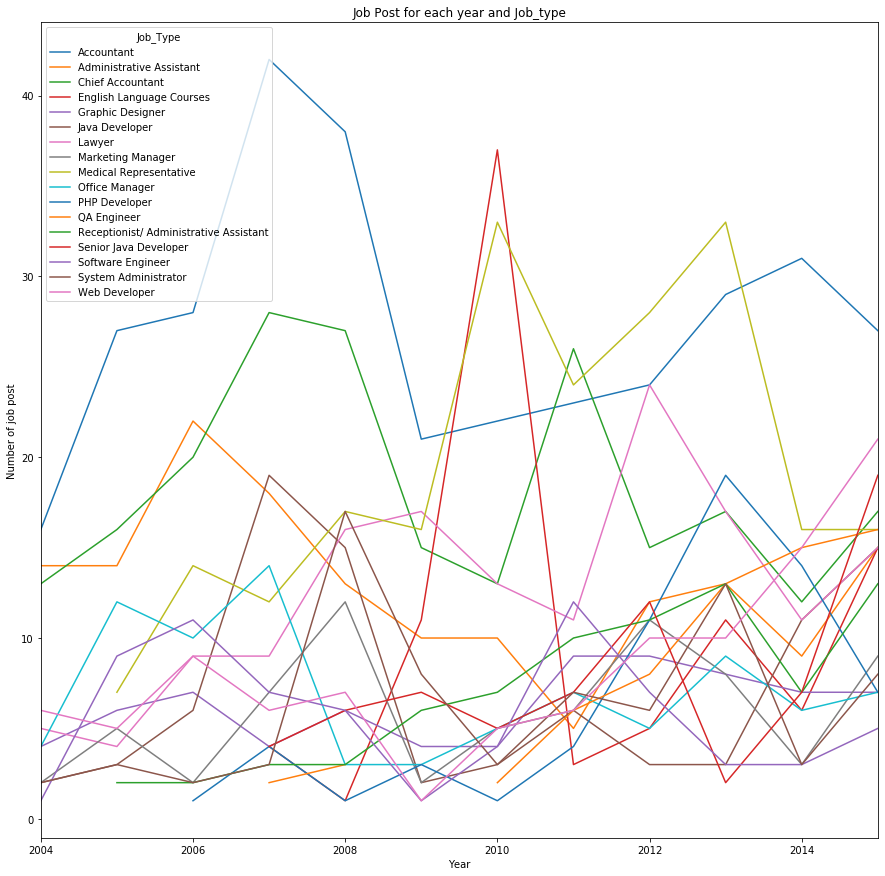

In [140]:
Job_type_per_year_1_w.plot(kind='line',figsize=(15,15))
plt.title('Job Post for each year and Job_type')
plt.xlabel('Year')
plt.ylabel('Number of job post')
plt.savefig('linechart.jpeg')
plt.show()

### Stackedbar Chart

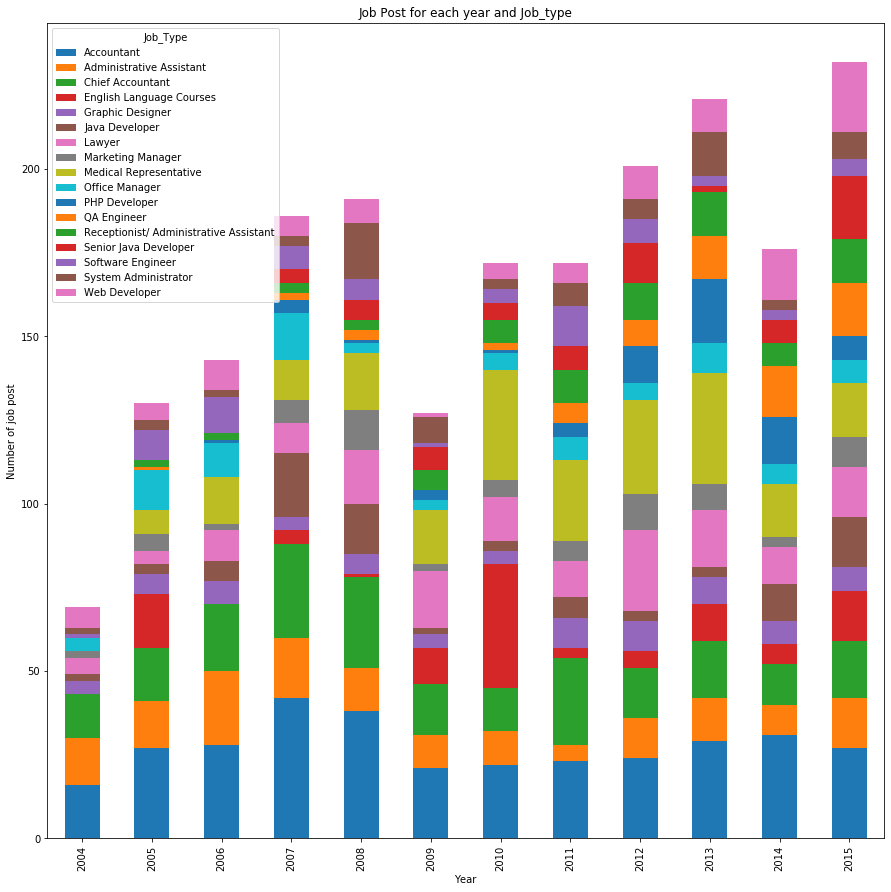

In [141]:
Job_type_per_year_1_w.plot(kind='bar',figsize=(15,15),stacked=True)
plt.title('Job Post for each year and Job_type')
plt.xlabel('Year')
plt.ylabel('Number of job post')
plt.savefig('stackedbarchart.jpeg')
plt.show()

Barplot using seaborn

In [142]:
import seaborn as sns

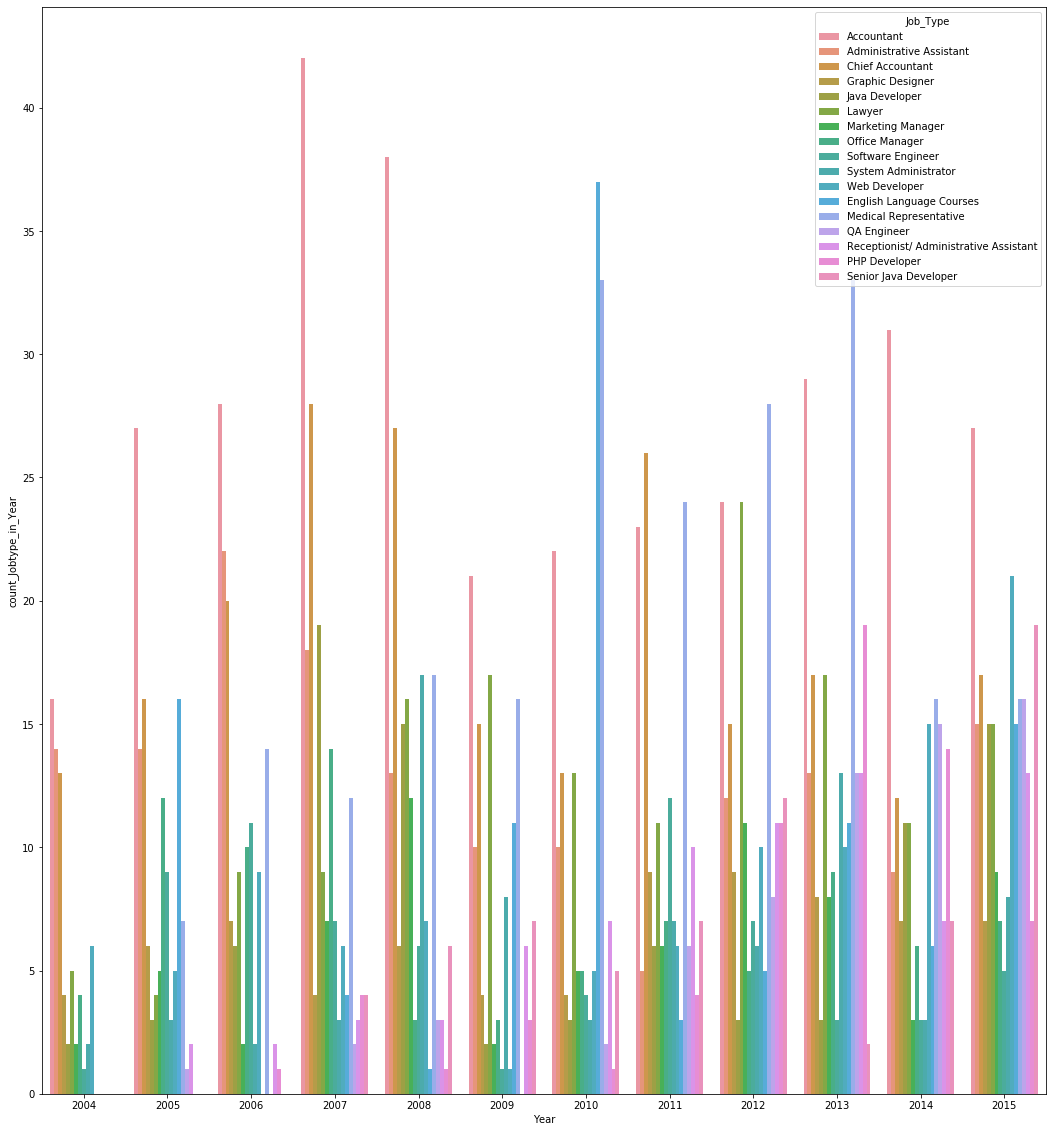

In [143]:
fig_dims = (18,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=Job_type_per_year_2, x='Year', y='count_Jobtype_in_Year',hue='Job_Type',dodge=True,ax=ax)


## Finding Job nature

In [144]:
#Finad the job nature and store in variable x
#X=data_N['Job_Type']
data_P=data_P[data_P['Title'].isnull()==False]
data_P.reset_index(inplace=True)

data_P.head(5)

,index,jobpost,Location,Title,IT,Year
0,0,AMERIA Investment Consulting Company\nJOB TITL...,"Yerevan, Armenia",Chief Financial Officer,False,2004
1,1,International Research & Exchanges Board (IREX...,"IREX Armenia Main Office; Yerevan, Armenia \nD...",Full-time Community Connections Intern (paid i...,False,2004
2,2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Yerevan, Armenia",Country Coordinator,False,2004
3,3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Manila, Philippines",BCC Specialist,False,2004
4,4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Yerevan, Armenia",Software Developer,True,2004


In [145]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [146]:
X=data_P['Title']

### Creating Corpus

In [147]:
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

### Remove punctuations from all title

In [148]:
# Remove punctuations from all title
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

data_words[0]

['chief', 'financial', 'officer']

### Define Stopwords, bigram model and lemmatization for title data

In [149]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [150]:
stop_words = stopwords.words('english')
stop_words.extend(['armenian', 'armenia', 'job', 'title', 'position','location','responsibilities','applications','procedures','deadline','required','qualifications','renumerations','salary','date','company','lic'])

In [151]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [152]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['chief', 'financial', 'officer']]


In [153]:
data_lemmatized[0:10]

[['chief', 'financial', 'officer'],
 ['community', 'connection', 'intern', 'pay', 'internship'],
 ['country', 'coordinator'],
 [],
 ['software', 'developer'],
 [],
 ['chief', 'finance', 'assistant'],
 ['pay', 'part', 'programmatic', 'intern'],
 ['assistant', 'manage', 'director'],
 ['program', 'assistant']]

In [154]:
# few null value is also coming so we are going to remove null from list
list2 = [x for x in data_lemmatized if x != []]

In [155]:
for i in range(len(list2)):
    list2[i] = ' '.join(list2[i])

In [156]:
list2[0:5]

['chief financial officer',
 'community connection intern pay internship',
 'country coordinator',
 'software developer',
 'chief finance assistant']

### Now we are selecting 1500 job title

In [157]:
import nltk
#nltk.download('punkt')

In [158]:
JobTypecount = {}
for data in list2:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in JobTypecount.keys():
            JobTypecount[word] = 1
        else:
            JobTypecount[word] += 1

In [159]:
len(JobTypecount)

1712

In [160]:
import heapq
# Selecting best 100 features
freq_words = heapq.nlargest(1500,JobTypecount,key=JobTypecount.get)

In [161]:
%%capture
#gather features
text = " ".join(freq_words)

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

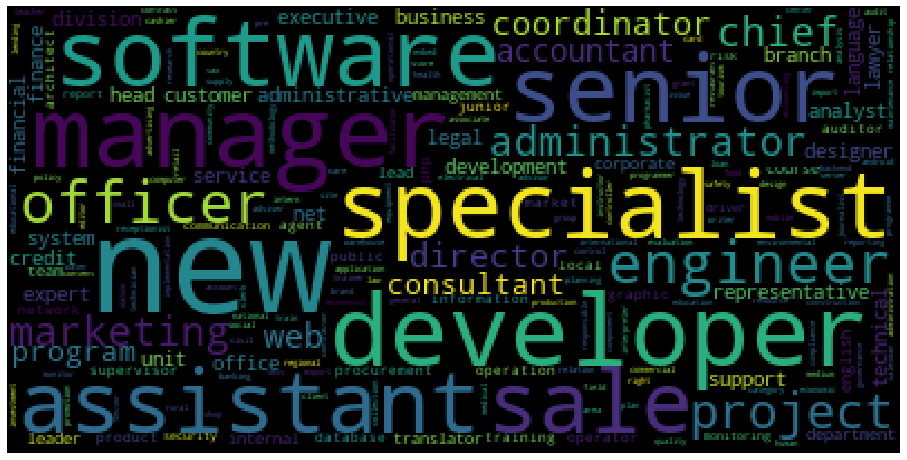

In [163]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature over  the time

In [164]:
for i in range(len(data_lemmatized)):
    data_lemmatized[i] = ' '.join(data_lemmatized[i])

In [165]:
date_field=data_P['Year'].tolist()

len(date_field)

18973

In [166]:
Job_year = pd.DataFrame(np.column_stack([data_lemmatized,date_field]), 
                               columns=['Job_title','Year'])

In [167]:
Job_year.head(5)

,Job_title,Year
0,chief financial officer,2004
1,community connection intern pay internship,2004
2,country coordinator,2004
3,,2004
4,software developer,2004


In [168]:
#Converting year to numeric value 

Job_year['Year']=Job_year['Year'].astype('int')

In [169]:
Job_year.dtypes

Job_title    object
Year          int32
dtype: object

In [170]:
Job_year.Year.value_counts()

2012    2140
2015    2009
2013    2009
2014    1980
2008    1782
2011    1695
2007    1538
2010    1506
2009    1191
2005    1138
2006    1111
2004     874
Name: Year, dtype: int64

In [171]:
#We will devide year into 3 equidistant bins to find the job nature over the period

Job_year['Year_bins']=pd.cut(Job_year['Year'],3,labels=['Phase1','Phase2','Phase3'])

In [172]:
Job_year.pivot_table(values='Year',index='Year_bins',aggfunc=['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
Phase1,2004,2007,4661
Phase2,2008,2011,6174
Phase3,2012,2015,8138


### Job nature change over the Phase1 (2004 to 2007)

In [173]:
YY=Job_year[Job_year['Year_bins']=='Phase1'].iloc[:,0]

In [174]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in YY:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

In [175]:
# import heapq
freq_words = heapq.nlargest(500,JobTypecount,key=JobTypecount.get)

In [176]:
%%capture
#gather features
text = " ".join(freq_words)

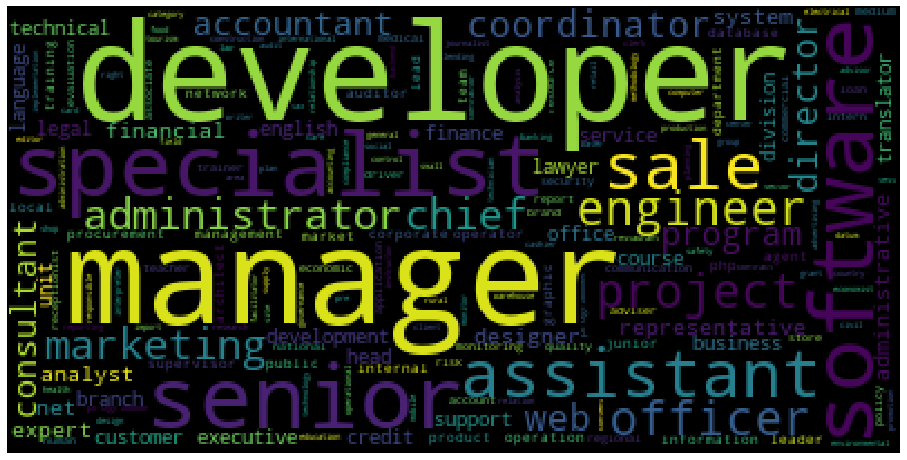

In [177]:
# Wordcloud need to draw for nature of job
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature change over the Phase2 (2008 to 2011)

In [178]:
AA=Job_year[Job_year['Year_bins']=='Phase2'].iloc[:,0]

In [179]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in AA:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

In [180]:
%%capture
#gather features
text = " ".join(freq_words)

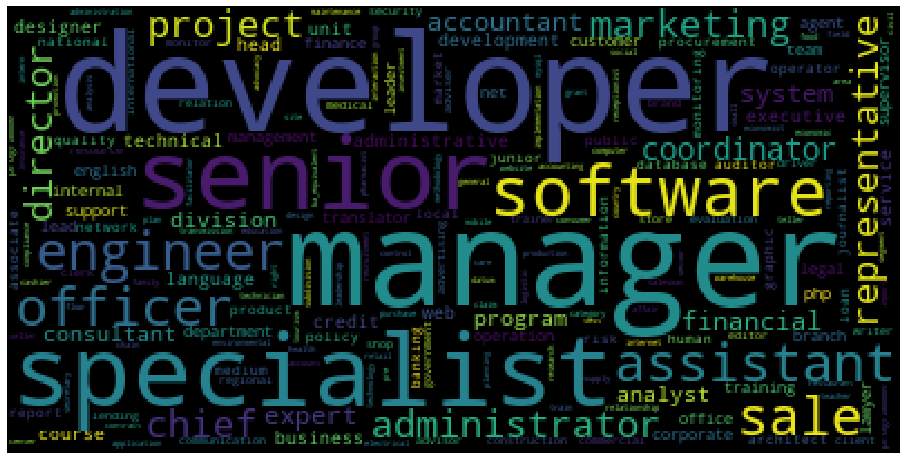

In [181]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Job nature change over the Phase3 (2012 to 2015)

In [182]:
ZZ=Job_year[Job_year['Year_bins']=='Phase3'].iloc[:,0]

In [183]:
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in ZZ:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

In [184]:
%%capture
#gather features
text = " ".join(freq_words)

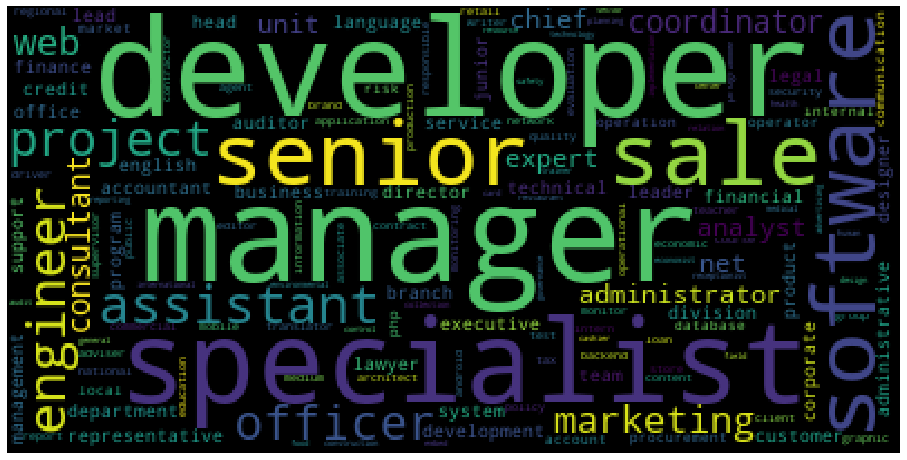

In [185]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## IT Job Classification

In [188]:
data = pd.read_csv('data_job_posts.csv')

In [189]:
data_P = data[['JobRequirment','IT','Title','RequiredQual']]

In [190]:
data_P.columns

Index(['JobRequirment', 'IT', 'Title', 'RequiredQual'], dtype='object')

In [191]:
# Defining X
data_P['X1'] = data_P['Title'].str.cat(data_P['JobRequirment'], sep =" ").str.cat(data_P['RequiredQual'], sep =" ")
X=data_P['X1']

# Defining Y
di={False:0,True:1}
data_P['IT_y']=data_P['IT'].map(di)
y=data_P['IT_y']

D:\DSP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\DSP\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [192]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

In [193]:
corpus[0]

'chief financial officer supervises financial management and administrative staff including assigning responsibilities reviewing employees work processes and products counseling employees giving performance evaluations and recommending disciplinary action serves as member of management team participating in both strategic and operational planning for the company directs and oversees the company financial management activities including establishing and monitoring internal controls managing cash and investments and managing the investment portfolio in collaboration with the investment team leader this includes but is not limited to evaluation of investment risk concentration risk fund deployment levels adequacy of loss and liquidity reserves assists investment team in development of proper documentation and internal systems directs and oversees the annual budgeting process including developing projections for financial planning and preparing budgets prepares external and internal financ

#### Stemming

In [194]:
from nltk.stem import PorterStemmer
#sentences = nltk.sent_tokenize(paragraph)
stemmer = PorterStemmer()


for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words]
    corpus[i] = ' '.join(words)  

In [195]:
corpus[0]

'chief financi offic supervis financi manag and administr staff includ assign respons review employe work process and product counsel employe give perform evalu and recommend disciplinari action serv as member of manag team particip in both strateg and oper plan for the compani direct and overse the compani financi manag activ includ establish and monitor intern control manag cash and invest and manag the invest portfolio in collabor with the invest team leader thi includ but is not limit to evalu of invest risk concentr risk fund deploy level adequaci of loss and liquid reserv assist invest team in develop of proper document and intern system direct and overse the annual budget process includ develop project for financi plan and prepar budget prepar extern and intern financi manag report such as audit financi statement tax return and report for the board of director and compani staff develop implement and maintain effici and effect account system and control to ensur complianc with na

### Creating the Tf-Idf model directly

In [196]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))

X = vectorizer.fit_transform(corpus).toarray()

In [197]:
X.shape

(19001, 331)

## Building Naive Bayes Model

In [198]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()

nb_clf.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Splitting the train and test data

In [199]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=123)

In [200]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(15200, 331)
(3801, 331)
(15200,)
(3801,)


### Model Evaluation

In [201]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,nb_clf.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,nb_clf.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8166272033675348
train_accuracy:  0.8010526315789473


In [202]:
print('AUC train :',metrics.roc_auc_score(train_y,nb_clf.predict(train_x)))
print('AUC test :',metrics.roc_auc_score(test_y,nb_clf.predict(test_x)))

AUC train : 0.8380416215565981
AUC test : 0.8438935318907146


In [203]:
from sklearn.metrics import classification_report
print(classification_report(test_y,nb_clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      3017
           1       0.53      0.89      0.67       784

    accuracy                           0.82      3801
   macro avg       0.75      0.84      0.77      3801
weighted avg       0.88      0.82      0.83      3801



Text(0.5, 15.0, 'Predicted label')

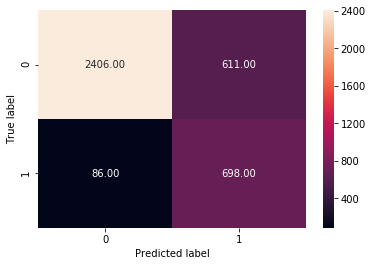

In [204]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            nb_clf.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100, 200, 400, 600, 800]}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=5,n_jobs=-1)
tree.fit(train_x,train_y)

tree.best_params_

radm_clf=RandomForestClassifier(oob_score=True,n_estimators=800,n_jobs=-1)
radm_clf.fit(train_x,train_y)

#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,radm_clf.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,radm_clf.predict(train_x))
print('train_accuracy: ',train_accuracy)

print('AUC train :',metrics.roc_auc_score(train_y,radm_clf.predict(train_x)))
print('AUC test :',metrics.roc_auc_score(test_y,radm_clf.predict(test_x)))

from sklearn.metrics import classification_report
print(classification_report(test_y,radm_clf.predict(test_x)))

# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            radm_clf.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

test_predicted_prob=pd.DataFrame(radm_clf.predict_proba(test_x))[[1]]
test_predicted_prob.columns=['prob']
actual=test_y.reset_index()
actual.drop('index',axis=1,inplace=True)

# making a DataFrame with actual and prob columns
df_test_predict = pd.concat([actual, test_predicted_prob], axis=1)
df_test_predict.columns = ['actual','prob']
df_test_predict.head()

test_roc_like_df = pd.DataFrame()
test_temp = df_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    
    accuracy=(test_temp['tp'].sum()+test_temp['tn'].sum()) / (test_temp['tp'].sum() + test_temp['fn'].sum()+test_temp['tn'].sum() + test_temp['fp'].sum())
    
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity,accuracy]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity','accuracy']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

test_roc_like_df.head(5)

## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

df_test_predict['predicted'] = df_test_predict['prob'].apply(lambda x: 1 if x > 0.204082 else 0)

import seaborn as sns
sns.heatmap(pd.crosstab(df_test_predict['actual'], df_test_predict['predicted']), annot=True, fmt='.0f')

accuracy=metrics.accuracy_score(df_test_predict.actual, df_test_predict.predicted)
print('Accuracy: ',round(accuracy,2))

from sklearn.metrics import classification_report
print(classification_report(df_test_predict.actual, df_test_predict.predicted))

## Text Clustering

In [207]:
train_x.shape

(15200, 331)

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [209]:
title=list2
title[0:5]

['chief financial officer',
 'community connection intern pay internship',
 'country coordinator',
 'software developer',
 'chief finance assistant']

In [210]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(title).toarray()

In [211]:
X.shape

(16141, 50)

## Cluster Error

In [212]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X)
    cluster_errors.append( clusters.inertia_ )

In [213]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,13321.446096
1,2,12085.523278
2,3,11072.075072
3,4,10548.641563
4,5,9858.454437
5,6,9606.146470
6,7,9131.461095
7,8,8907.519296
8,9,8562.332503
9,10,8293.391783


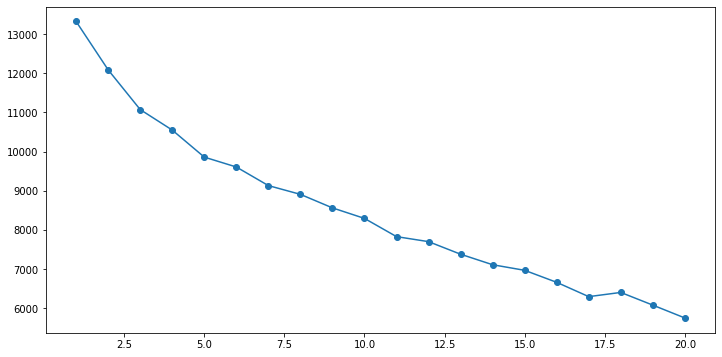

In [214]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Silhoute co efficient

In [215]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

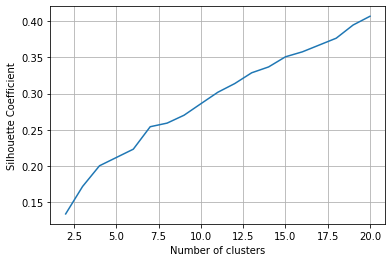

In [216]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [217]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [218]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print     

Top terms per cluster:
Cluster 0:
 manager
 sale
 project
 marketing
 office
 branch
 program
 finance
 financial
 development
Cluster 1:
 service
 customer
 manager
 specialist
 support
 sale
 representative
 head
 coordinator
 technical
Cluster 2:
 developer
 software
 senior
 net
 web
 designer
 business
 team
 analyst
 project
Cluster 3:
 officer
 credit
 chief
 financial
 finance
 project
 program
 senior
 executive
 development
Cluster 4:
 specialist
 assistant
 engineer
 senior
 software
 administrator
 coordinator
 director
 sale
 consultant


## Thanks...